## Variance Inflation Factor

The Variance Inflation Factor (VIF) is a measure used in multiple regression analysis to detect the **severity** of Multicollinearity. It essentially measures how much the variance of an estimated regression coefficient is increased because of collinearity. 
$$\text{VIF}_i = \frac{1}{1-R_i^2}=\frac{1}{\text{tolerance}}$$
- represents the unadjusted [[§Coefficient of Determination|Coefficient of Determination]] for regressing the $i$-th independent variable on the remaining ones

A VIF value of 1 indicates no multicollinearity, When VIF is higher than 10 or tolerance is lower than 0.1, there is significant multicollinearity that needs to be corrected.

In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Generate a larger dataset with some correlation between variables
np.random.seed(42)
n_samples = 1000

# Generate base features
X1 = np.random.normal(100, 20, n_samples)
X2 = X1 * 0.5 + np.random.normal(50, 10, n_samples)  # Correlated with X1
X3 = np.random.normal(75, 15, n_samples)  # Independent
X4 = X2 * 0.7 + X3 * 0.3 + np.random.normal(0, 5, n_samples)  # Correlated with X2 and X3

# Create DataFrame
data = {
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4
}
df = pd.DataFrame(data)

# Add a constant term for the intercept
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the VIF for the constant term
vif_data = vif_data[vif_data['feature'] != 'const']

print("\nVariance Inflation Factors:")
print(vif_data)

# Display correlation matrix
print("\nCorrelation Matrix:")
print(df.corr().round(3))


Variance Inflation Factors:
  feature       VIF
1      X1  1.889993
2      X2  5.106101
3      X3  1.783263
4      X4  5.122190

Correlation Matrix:
       X1     X2     X3     X4
X1  1.000  0.686  0.022  0.569
X2  0.686  1.000  0.008  0.807
X3  0.022  0.008  1.000  0.397
X4  0.569  0.807  0.397  1.000


# Analysis of Multicollinearity

Based on the VIF and correlation matrix results, we can draw the following conclusions:

1. **VIF Analysis**:
   - X1 (VIF = 1.89) and X3 (VIF = 1.78) show relatively low VIF values (<5), indicating acceptable levels of multicollinearity
   - X2 (VIF = 5.11) and X4 (VIF = 5.12) show higher VIF values (>5), suggesting concerning levels of multicollinearity

2. **Correlation Analysis**:
   - Strong correlation (0.807) between X2 and X4
   - Moderate to strong correlation (0.686) between X1 and X2
   - Moderate correlation (0.569) between X1 and X4
   - X3 is relatively independent, with low correlations to X1 (0.022) and X2 (0.008)
   - Moderate correlation (0.397) between X3 and X4

**Conclusions**:
- Consider removing either X2 or X4 from the model due to their high VIF values and strong correlation
- X3 could be safely kept in the model due to its low VIF and weak correlations with most variables
- X1 shows moderate correlations but acceptable VIF, suggesting it could be retained in the model

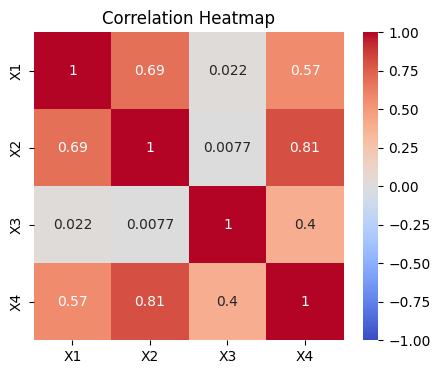

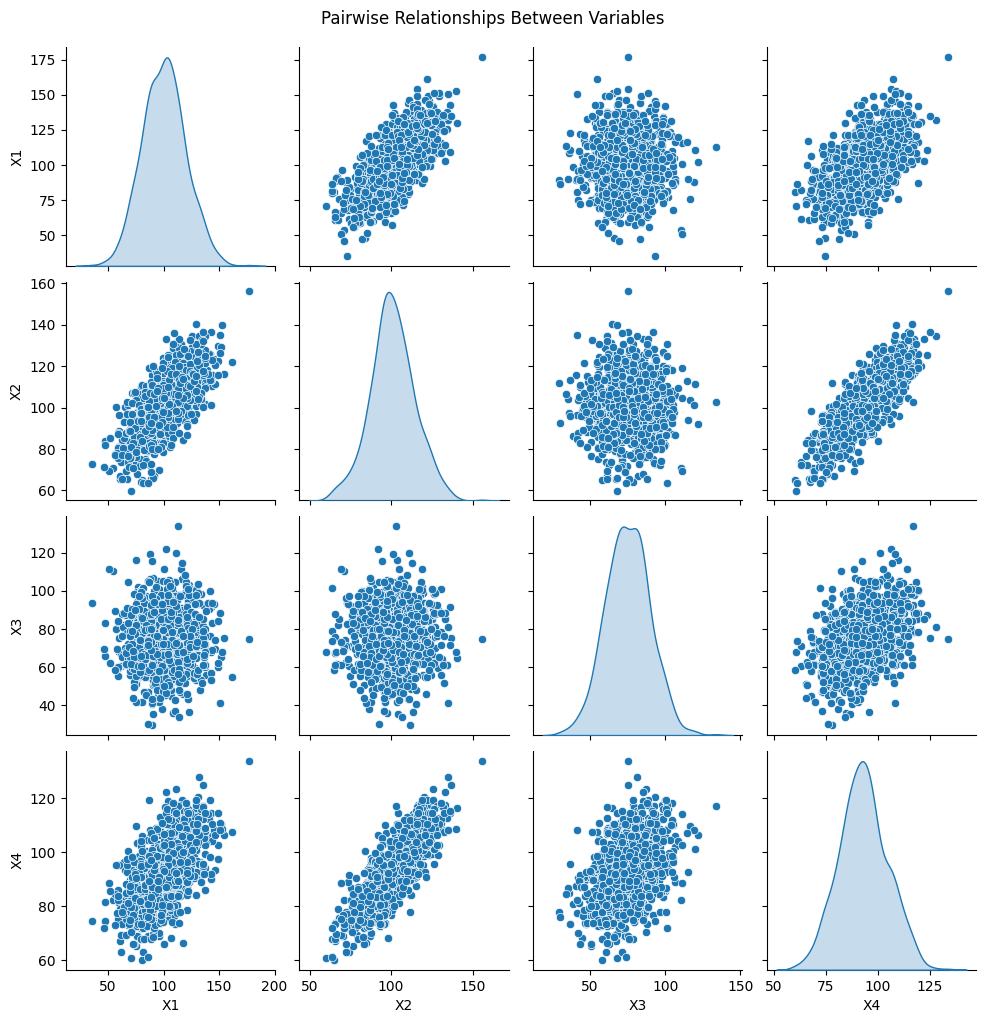

In [ ]:
# Opitional Visualizations for intuitive understanding
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure size
plt.figure(figsize=(5, 4))

# Create a correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Create a pairplot to show relationships between variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()